# Travelling Salesman - Simulated Annealing

### A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


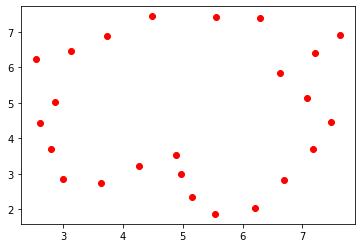

In [2]:
import math
import random
from matplotlib import pyplot as plt

# converting the input matrix into a 2d list
with open("TSP Matrix2.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


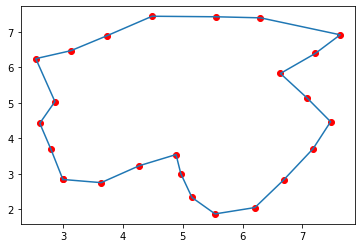

Initial Greedy Path: [22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 10, 9]
Initial Greedy Path distance: 27.90691244339338


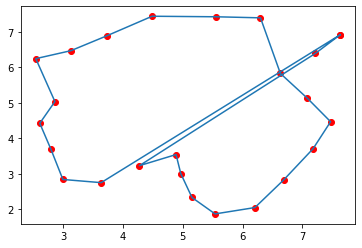

Initial Random Path: [12, 6, 3, 14, 1, 2, 7, 9, 10, 19, 20, 22, 13, 0, 8, 11, 21, 17, 5, 16, 15, 23, 18, 4]
Initial Random Path distance: 65.80368407112402


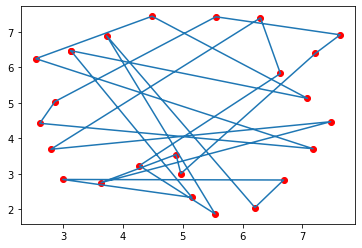

In [129]:
# function to calculate the distance between two cities
def calculate_hypotenuse(cits, a, b):
    x1, y1 = cits[a]
    x2, y2 = cits[b]
    return math.sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(cits, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(cits, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(cits, current, ind) < smallest:
                smallest = calculate_hypotenuse(cits, current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.show()

optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(cities, optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, random.randrange(len(cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(cities, initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(cities, initial_random))
draw_path(cities, initial_random)

Running Simulated Annealing. Starting temperature = 25, minimum temperature = 0.001, alpha = 0.835
Initial route:


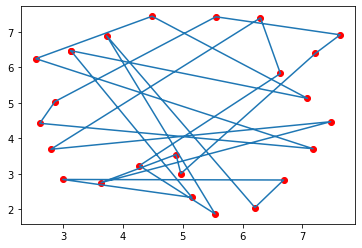

Initial distance = 65.80368407112402
Final route:


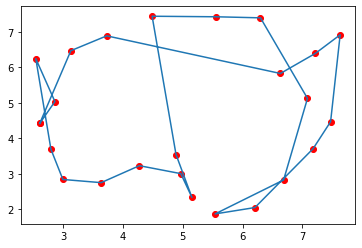

Final distance =  29.787144023460705


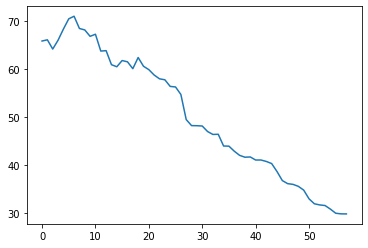

In [164]:
def acceptance_probability(current, new, temp):
    if new < current:
        return 1
    else:
        return math.exp( (current-new)/temp )

# function that swaps two random nodes
def node_swapper(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def simulated_annealing(cits, path, tmax, tmin, alpha):
    p = list(path)
    print(f"Running Simulated Annealing. Starting temperature = {tmax}, minimum temperature = {tmin}, alpha = {alpha}")
    print("Initial route:")
    draw_path(cits, p)
    current = calculate_distance(cits, p)
    print("Initial distance =", current)
    dists = [current]
    while tmax > tmin:
        new_p = node_swapper(p)
        new_p_dist = calculate_distance(cits, new_p)
        tmax
        if acceptance_probability(current, new_p_dist, tmax) > random.random():
            p = list(new_p)
            current = calculate_distance(cits, p)
            dists.append(current)
            tmax *= alpha
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

simulated_annealing(cities, initial_random, 25, 0.001, 0.835)

### A random map of 100 nodes

[(2.209, 8.586), (4.948, 6.761), (0.805, 2.258), (2.722, 4.322), (8.147, 0.474), (3.999, 4.159), (7.16, 1.08), (9.066, 4.468), (2.801, 1.449), (9.073, 8.393), (4.821, 1.628), (8.437, 5.63), (1.491, 1.596), (8.288, 5.978), (9.292, 1.587), (9.197, 8.669), (9.309, 4.699), (5.519, 3.279), (3.409, 3.552), (4.471, 4.864), (8.295, 6.52), (2.681, 2.662), (5.062, 8.193), (6.846, 3.683), (2.156, 2.323), (3.927, 1.311), (5.072, 8.737), (7.998, 3.542), (7.597, 3.69), (5.332, 5.252), (8.784, 2.093), (9.759, 2.401), (0.527, 0.078), (6.003, 7.506), (5.736, 7.128), (2.063, 1.007), (7.486, 3.946), (8.767, 5.803), (8.367, 6.343), (7.017, 2.952), (5.226, 2.902), (8.039, 4.685), (8.985, 2.451), (4.06, 2.348), (8.863, 0.247), (2.365, 5.835), (9.134, 0.59), (5.503, 1.516), (2.517, 4.91), (3.014, 3.711), (4.808, 9.417), (1.795, 5.977), (2.982, 5.546), (7.64, 7.003), (0.645, 3.002), (3.101, 1.208), (4.008, 1.08), (2.397, 2.306), (5.333, 9.267), (5.858, 7.423), (8.366, 1.05), (5.952, 7.33), (1.622, 7.801), (1.

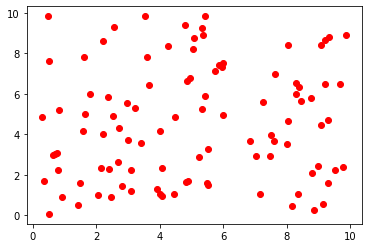

In [86]:
rand_cities = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    rand_cities.append((a, b))
    

print(rand_cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*rand_cities)
plt.scatter(x, y, c="r")
plt.show()

Initial Greedy Path: [42, 30, 99, 31, 14, 46, 44, 4, 60, 6, 39, 66, 28, 36, 27, 41, 11, 37, 13, 38, 20, 85, 72, 16, 7, 9, 15, 97, 84, 83, 53, 74, 23, 90, 29, 95, 64, 1, 34, 61, 59, 33, 22, 26, 65, 58, 50, 70, 89, 73, 68, 80, 52, 45, 51, 93, 48, 3, 91, 63, 76, 82, 71, 87, 54, 2, 67, 77, 81, 35, 69, 8, 55, 25, 56, 94, 96, 10, 78, 88, 47, 40, 17, 19, 5, 18, 49, 21, 57, 24, 75, 43, 12, 32, 98, 62, 0, 92, 79, 86]
Initial Greedy Path distance: 99.38247036312174


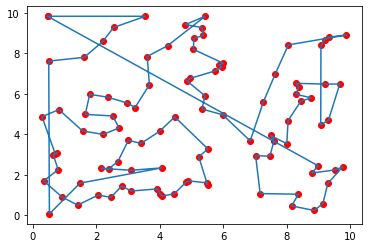

Initial Random Path: [6, 41, 37, 12, 1, 91, 25, 3, 56, 46, 18, 71, 61, 20, 50, 26, 35, 43, 83, 77, 93, 55, 23, 62, 51, 67, 32, 52, 7, 74, 28, 75, 87, 98, 31, 8, 72, 45, 86, 85, 65, 69, 4, 11, 82, 95, 66, 73, 70, 49, 13, 36, 14, 22, 57, 88, 16, 40, 17, 53, 10, 19, 34, 59, 99, 42, 94, 89, 96, 64, 15, 44, 47, 58, 63, 97, 29, 84, 92, 33, 24, 27, 38, 2, 80, 78, 68, 76, 0, 5, 79, 90, 81, 21, 39, 9, 48, 54, 30, 60]
Initial Random Path distance: 379.37437952332994


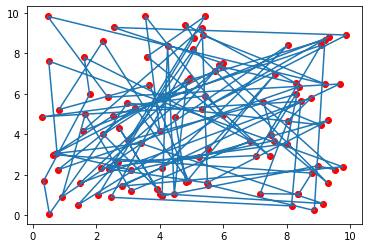

In [87]:
initial_greedy = create_initial_greedy(rand_cities, random.randrange(len(rand_cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(rand_cities, initial_greedy))
draw_path(rand_cities, initial_greedy)

initial_random = create_initial_random(rand_cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(rand_cities, initial_random))
draw_path(rand_cities, initial_random)

Running Simulated Annealing. Starting temperature = 80, minimum temperature = 0.001, alpha = 0.975
Initial route:


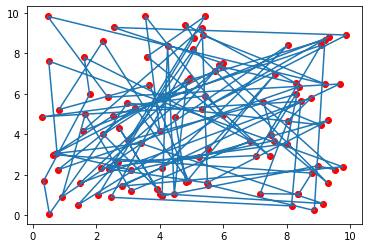

Initial distance = 379.37437952332994
Final route:


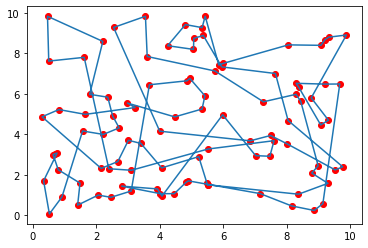

Final distance =  120.88799527000899


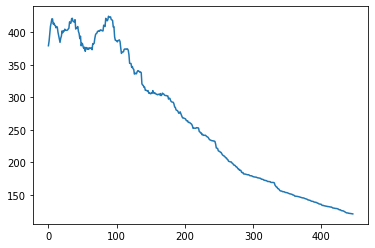

In [128]:
simulated_annealing(rand_cities, initial_random, 80, 0.001, 0.975)

Running Simulated Annealing. Starting temperature = 0.4, minimum temperature = 0.001, alpha = 0.83
Initial route:


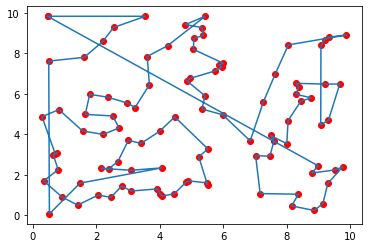

Initial distance = 99.38247036312174
Final route:


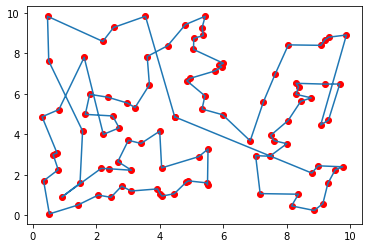

Final distance =  95.00813750569841


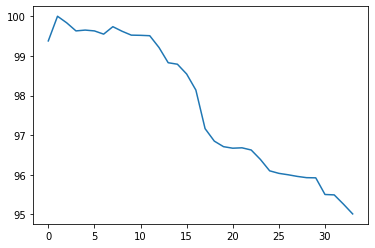

In [121]:
simulated_annealing(rand_cities, initial_greedy, 0.4, 0.001, 0.83)